<a href="https://colab.research.google.com/github/chihchao/application-of-programming/blob/main/machine_learning_knn_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**葡萄酒資料集（Wine Dataset）」** 記錄了來自義大利的三種葡萄酒類別，每個樣本有 13 項化學成分作為特徵。

---

## 資料集總覽

| 項目 | 說明 |
|------|------|
| 樣本數（rows） | 178 筆 |
| 特徵數（features） | 13 個連續變數 |
| 類別數（targets） | 3 種葡萄酒 |
| 任務型別 | 多類別分類 |
| 資料來源 | UCI Machine Learning Repository（by Forina et al.）  

---

## 🎯 預測目標（target）

此資料集的目標是預測葡萄酒的「**類別**」，共 3 類，分別為：

| 類別編號 | 類別名稱（`target_names`） | 備註 |
|---|---|---|
| 0 | class_0（實際名稱為 Cultivar 1） | 一種特定品種的葡萄酒 |
| 1 | class_1（Cultivar 2） | 第二種品種 |
| 2 | class_2（Cultivar 3） | 第三種品種 |

這三種酒來自義大利同一區域，但由不同品種的葡萄釀製。

---

## 🧪 特徵（features）

每筆資料都有以下 13 項化學分析數值，這些變數都為連續型：

| 特徵名稱 | 中文說明 |
|---|---|
| alcohol | 酒精含量 (%) |
| malic_acid | 蘋果酸含量 |
| ash | 灰分（礦物殘留） |
| alcalinity_of_ash | 灰分鹼度 |
| magnesium | 鎂含量 |
| total_phenols | 總酚類物質 |
| flavanoids | 類黃酮（抗氧化成分） |
| nonflavanoid_phenols | 非類黃酮酚 |
| proanthocyanins | 原花青素 |
| color_intensity | 色澤強度 |
| hue | 色調 |
| od280/od315_of_diluted_wines | 葡萄酒稀釋液的 OD 比值 |
| proline | 脯胺酸（氨基酸的一種）含量 |

這些特徵來自化學實驗分析，能夠區分出不同類型的葡萄酒。

---

## 📊 基本統計與分析建議

- 類別分布不算極端不平衡（類別 0 最多、類別 2 最少），適合直接進行多類別分類任務。
- 特徵之間可能存在高度共線性（例如：`flavanoids` 與 `total_phenols` 高相關），可以考慮進行 PCA 降維或特徵選擇。
- 特徵尺度不一（如 `proline` 範圍大、`hue` 很小），因此 **KNN、SVM 等模型在訓練前需要標準化**。

---

## 🧰 載入方式（scikit-learn）

```python
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)
print(wine.DESCR)  # 顯示資料集詳細說明

X = wine.data       # 特徵（DataFrame）
y = wine.target     # 標籤（Series）
```

---


In [8]:
# 載入資料
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)
X, y = wine.data, wine.target

In [9]:
import pandas as pd

df = pd.DataFrame(X, columns = wine.feature_names)
df['target'] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
print("\n📌 資料基本資訊")
print(df.info())

print("\n📌 描述性統計")
print(df.describe())

print("\n📌 類別分佈（target）")
print(df['target'].value_counts())

# 3. 缺值檢查
print("\n📌 每欄缺值數量")
print(df.isnull().sum())

<Axes: >

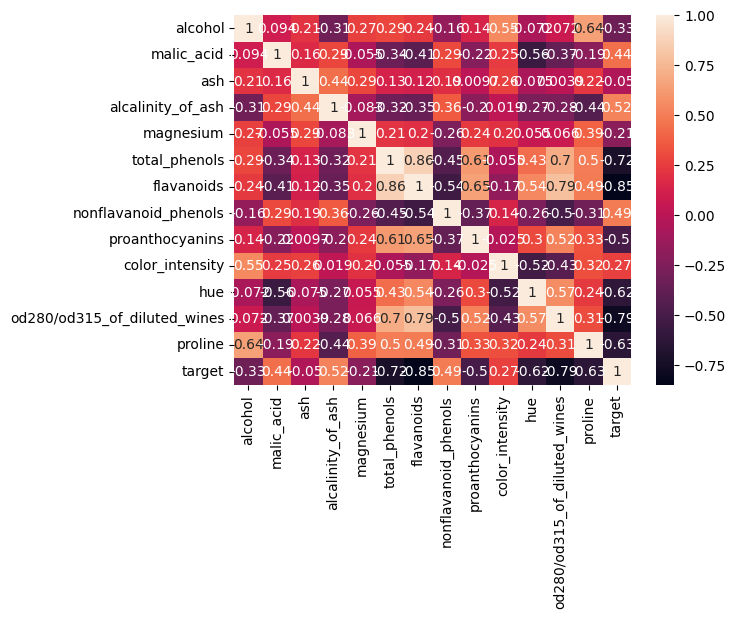

In [7]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)  # 可以調整 n_neighbors 參數
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = knn.predict(X_test_scaled)
print("準確率：", accuracy_score(y_test, y_pred))
print("分類報告：\n", classification_report(y_test, y_pred))

準確率： 0.9444444444444444
分類報告：
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [17]:
# import numpy as np
# new_data = np.array([[13.48,1.64,2.84,15.5,110.0,2.3,2.68,0.34,1.36,4.6,1.09,2.78,880.0]])
new_data = pd.DataFrame([[13.48,1.64,2.84,15.5,110.0,2.3,2.68,0.34,1.36,4.6,1.09,2.78,880.0]], columns=wine.feature_names)
# 預測
new_data_scaled = scaler_x.transform(new_data)
prediction = knn.predict(new_data_scaled)
predicted_label = wine.target_names[prediction[0]]
print("預測結果：", predicted_label)

預測結果： class_0


In [18]:
import joblib

# 儲存模型到檔案
joblib.dump(knn, 'knn_wine_model.pkl')


['knn_wine_model.pkl']

In [22]:
import joblib

# Save the scaler
joblib.dump(scaler_x, 'scaler_x.pkl')


['scaler_x.pkl']

In [21]:
# 從檔案載入模型
loaded_model = joblib.load('knn_wine_model.pkl')
loaded_scaler = joblib.load('scaler_x.pkl')


new_data = pd.DataFrame([[13.48,1.64,2.84,15.5,110.0,2.3,2.68,0.34,1.36,4.6,1.09,2.78,880.0]], columns=wine.feature_names)
# 用來預測
pred = loaded_model.predict(loaded_scaler.transform(new_data))
print("預測結果：", wine.target_names[pred[0]])


預測結果： class_0


### 交叉驗證與網格搜索

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# 建立處理流程（Pipeline）
pipeline = Pipeline([
    ("scaler", StandardScaler()),           # 標準化
    ("knn", KNeighborsClassifier())         # KNN 模型
])

# 設定搜尋的參數空間
param_grid = {
    "knn__n_neighbors": list(range(3, 15)),
    "knn__weights": ["uniform", "distance"]
}

# 建立 GridSearchCV 搜尋最佳參數
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=4
)

# 執行模型訓練與搜尋
grid.fit(X_train, y_train)

# 預測測試集 & 顯示結果
print("最佳參數：", grid.best_params_)
print("交叉驗證準確率：", grid.best_score_)

最佳參數： {'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
交叉驗證準確率： 0.9581349206349207


In [25]:
# 使用最佳參數訓練
best_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=9, weights='uniform')),
])
best_pipe.fit(X_train, y_train)

y_pred  = best_pipe.predict(X_test)
print("準確率：", accuracy_score(y_test, y_pred))
print("分類報告：\n", classification_report(y_test, y_pred))

準確率： 0.9444444444444444
分類報告：
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [26]:
# 儲存模型
joblib.dump(best_pipe, "wine_knn_pipeline.joblib")
print("模型已儲存")

# 3. 載入模型
loaded_model = joblib.load("wine_knn_pipeline.joblib")

# 預測
new_data = pd.DataFrame([[13.48,1.64,2.84,15.5,110.0,2.3,2.68,0.34,1.36,4.6,1.09,2.78,880.0]], columns=wine.feature_names)
pred = loaded_model.predict(new_data)
print("預測結果：", wine.target_names[pred[0]])

模型已儲存
預測結果： class_0
